In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
# import usage and stations
usage = pd.read_feather('bixi_usage_2023_cleaned.feather')
stations = pd.read_feather('stations_2023_altitude.feather')

In [3]:
# filter unknown pickup or dropoff
usage = usage[(usage['end_station_id'] != -1) &
        (usage['start_station_id'] != -1)]

In [4]:
# merge the altitude data in the usage df
df = usage.merge(stations['altitude_m'].rename('altitude_m_start'), how='left', left_on='end_station_id', right_index=True)
df = df.merge(stations['altitude_m'].rename('altitude_m_end'), how='left', left_on='start_station_id', right_index=True)
df['altitude_diff'] = df['altitude_m_start'] - df['altitude_m_end']
df = df.dropna(subset=['altitude_diff'])

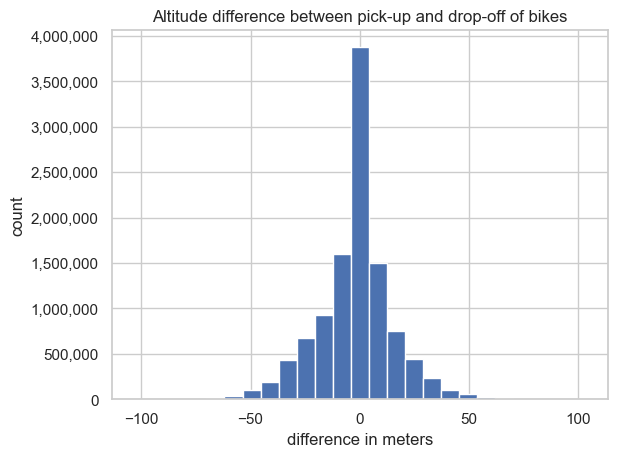

,count,mean,std,min,25%,50%,75%,max
altitude_diff,10991109.00,-2.19,17.44,-103.24,-10.02,-0.54,5.64,103.24


In [5]:
ax = df['altitude_diff'].plot(kind='hist', bins=25,
                                                title='Altitude difference between pick-up and drop-off of bikes',
                                                xlabel='difference in meters',
                                                ylabel='count')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()
display(df['altitude_diff'].to_frame().describe().T)

=> Difference in altitude doesn't appear to be a major factor